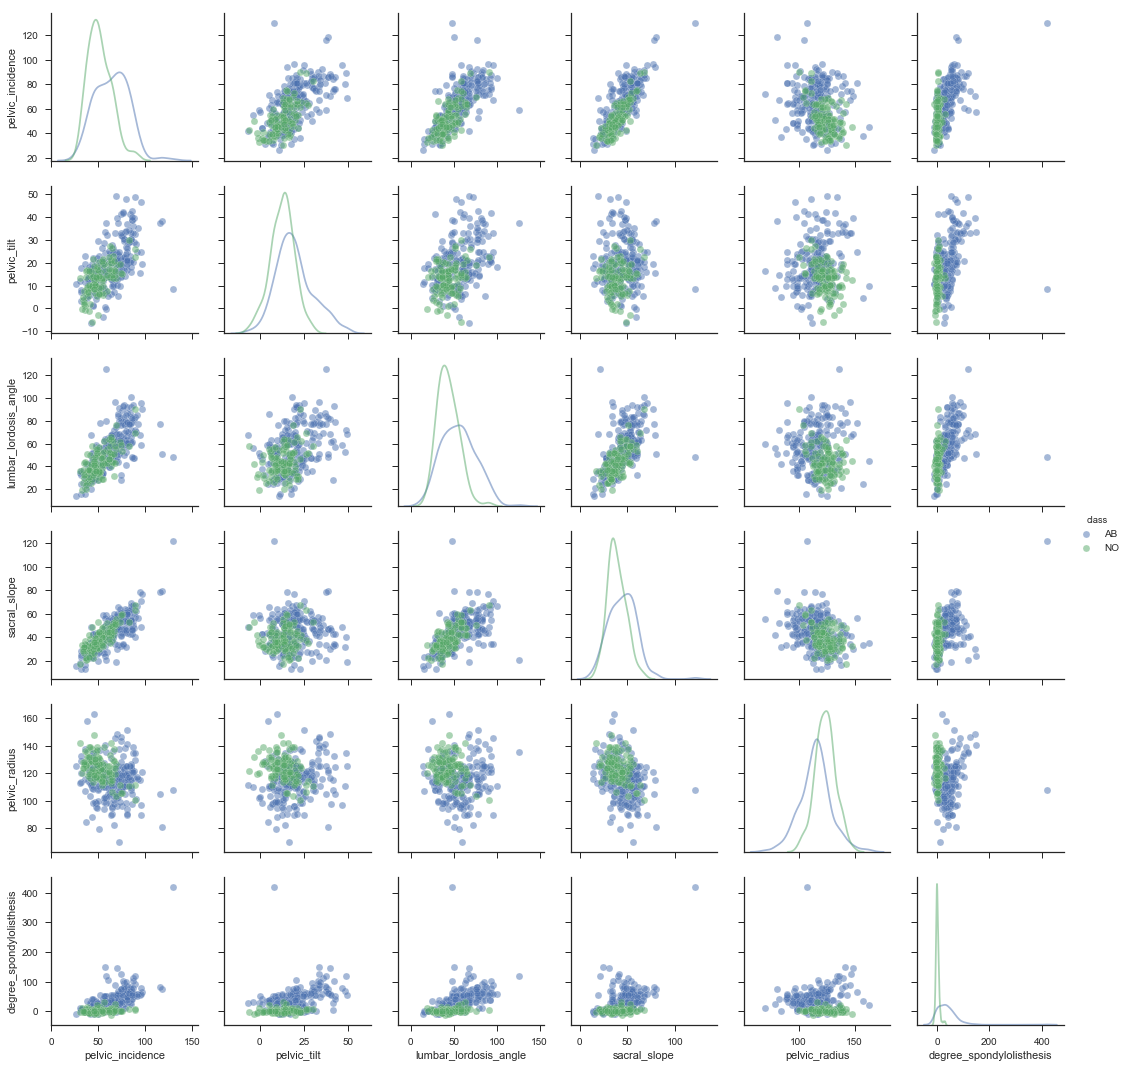

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas import  *
from numpy import *
from sklearn import *
from sklearn.metrics import classification_report, confusion_matrix
names = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','class']
inf552= pd.read_csv("C:\\Users\\DELL\\Desktop\\INF552\\column_2C.dat", sep='\s+',names=names)
sns.set(style="ticks", color_codes=True)
sns.pairplot(inf552 ,hue="class", plot_kws={"alpha":0.5}, diag_kws={"alpha":0.5},diag_kind='kde')

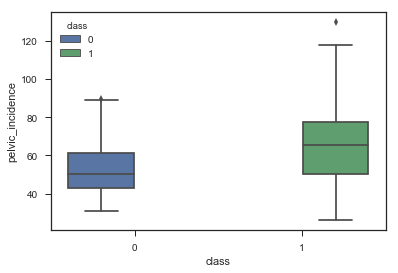

In [44]:
inf552['class']=inf552['class'].replace(['AB','NO'],[1,0])
i=inf552.columns
d0=inf552.loc[:,[i[0],'class']]; sns.boxplot(x="class", y=i[0], hue="class",data=d0)

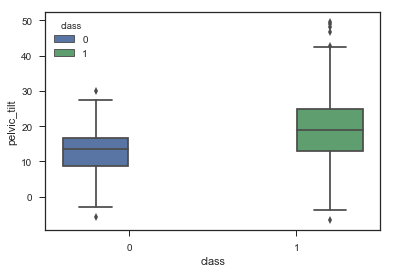

In [45]:
d1=inf552.loc[:,[i[1],'class']]; sns.boxplot(x="class", y=i[1], hue="class",data=d1)

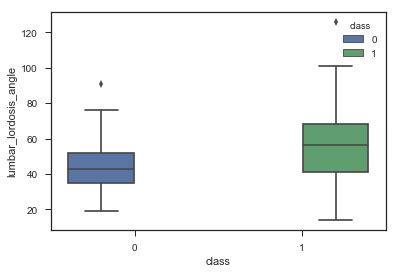

In [46]:
d2=inf552.loc[:,[i[2],'class']]; sns.boxplot(x="class", y=i[2], hue="class",data=d2)

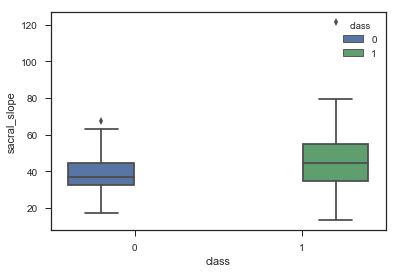

In [47]:
d3=inf552.loc[:,[i[3],'class']]; sns.boxplot(x="class", y=i[3], hue="class",data=d3)

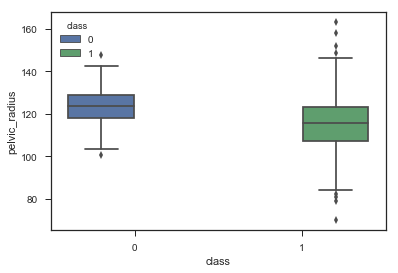

In [48]:
d4=inf552.loc[:,[i[4],'class']]; sns.boxplot(x="class", y=i[4], hue="class",data=d4)

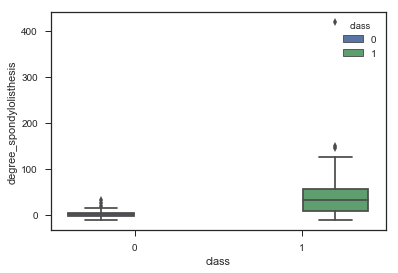

In [49]:
d5=inf552.loc[:,[i[5],'class']]; sns.boxplot(x="class", y=i[5], hue="class",data=d5)

In [50]:
#Preprocessing
inf552_n= inf552.iloc[:,0:6]
#min_max_scaler = preprocessing.MinMaxScaler()
#inf552_n = min_max_scaler.fit_transform(inf552_n)
#Select the training data and the test data 
inf_train=concatenate((inf552_n.iloc[210:280,:],inf552_n.iloc[0:140,:]),axis=0)
inf_test=concatenate((inf552_n.iloc[280:310,:],inf552_n.iloc[140:210,:]),axis=0)
#get target
inf_train_target = concatenate((inf552.iloc[210:280,6],inf552.iloc[0:140,6]),axis=0)
inf_test_target = concatenate((inf552.iloc[280:310,6],inf552.iloc[140:210,6]),axis=0)

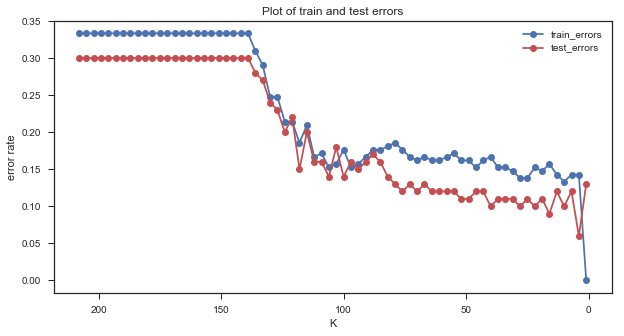

the best k for the Euclidean distance is  4
the best test error for Euclidean distance is  0.06
the lowest training error for Euclidean distance is  0.0


In [64]:
#KNN WITH Euclidean metric ( k ∈{208,205,...,7,4,1,}) 
from sklearn.neighbors import KNeighborsClassifier
train_errors=[]
test_errors=[]
min_rate1=1;min_rate2=1;
a=tuple(range(208,-1,-3))
for i in a:
    knn_E = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2, weights='uniform')
    knn_E.fit(inf_train, inf_train_target)
    inf_train_pred=knn_E.predict(inf_train)
    train_errors.append(sum(inf_train_target!=inf_train_pred)/len(inf_train_target))
    inf_test_pred=knn_E.predict(inf_test)
    test_errors.append(sum(inf_test_target!=inf_test_pred)/len(inf_test_target))
    if sum(inf_train_target!=inf_train_pred)/len(inf_train_target) <= min_rate1:
        min_rate1=sum(inf_train_target!=inf_train_pred)/len(inf_train_target)
    if sum(inf_test_target!=inf_test_pred)/len(inf_test_target) <= min_rate2:
        min_rate2=sum(inf_test_target!=inf_test_pred)/len(inf_test_target)
        test_pred_min=inf_test_pred
        kk=i
errors={"train_errors":train_errors,"test_errors":test_errors}
errors=DataFrame(errors)
errors.index = range(208,-1,-3)
plt.figure(figsize=(10,5))
xlist1 = errors.iloc[:,0]
xlist2 = errors.iloc[:,1]
ylist = list(range(208,-1,-3))
plt.title("Plot of train and test errors") 
plt.xlabel("K")
plt.ylabel("error rate")
plt.plot(ylist,xlist1,"b-o")
plt.plot(ylist,xlist2,"r-o")
plt.gca().invert_xaxis() 
plt.legend(loc='best')
plt.show()
print("the best k for the Euclidean distance is ",kk)
print("the best test error for Euclidean distance is ",min_rate2)
print("the lowest training error for Euclidean distance is ",min_rate1)

In [74]:
# Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗.
print(confusion_matrix(inf_test_target,test_pred_min))  
tpr=25/(25+5);tnr=69/(69+1); 
precision=25/(25+1); f1=2*25/(2*25+1+5);
print(" true positive rate is",tpr)
print(" true negative rate is",tnr)
print(" precision is",precision)
print(" F-score is",f1)
print(classification_report(inf_test_target,test_pred_min))

[[25  5]
 [ 1 69]]
 true positive rate is 0.8333333333333334
 true negative rate is 0.9857142857142858
 precision is 0.9615384615384616
 F-score is 0.8928571428571429
             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



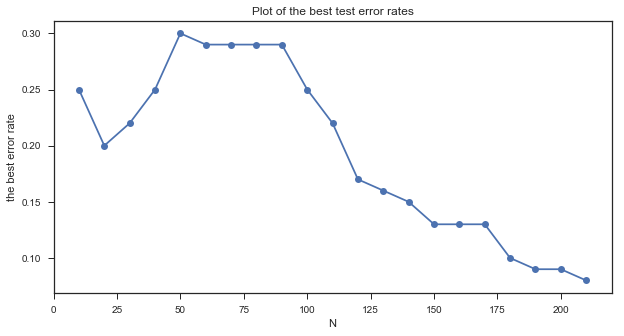

the best test error is  0.08
the lowest training error is 0.0


In [65]:
#KNN WITH Euclidean metric ( N ∈ {10,20,30,...,210}) 
n=tuple(range(10,211,10))
mini_rs1=[];mini_rs2=[];
for i in n:
    aa=math.floor(i/3);bb=i-aa
    #Select the training data
    train=concatenate((inf552_n.iloc[210:210+aa,:],inf552_n.iloc[0:bb,:]),axis=0)
    #get target
    train_target = concatenate((inf552.iloc[210:210+aa,6],inf552.iloc[0:bb,6]),axis=0)
    ks=tuple(range(1,i+1,5));min_r1=1;min_r2=1;
    for j in ks:
        knn_E2 = KNeighborsClassifier(n_neighbors=j, metric='minkowski', p=2, weights='uniform')
        knn_E2.fit(train, train_target)
        train_pred=knn_E2.predict(train)
        test_pred123=knn_E2.predict(inf_test)
        if sum(train_target!=train_pred)/len(train_target)< min_r1:
            min_r1=sum(train_target!=train_pred)/len(train_target)
        if sum(inf_test_target!=test_pred123)/len(inf_test_target) < min_r2:
            min_r2=sum(inf_test_target!=test_pred123)/len(inf_test_target)
    mini_rs1.append(min_r1);mini_rs2.append(min_r2);
plt.figure(figsize=(10,5))
plt.title("Plot of the best test error rates") 
plt.xlabel("N")
plt.ylabel("the best error rate")
plt.plot(list(range(10,211,10)),mini_rs2,"b-o")
plt.show()
print("the best test error is ",min(mini_rs2))
print("the lowest training error is",min(mini_rs1))

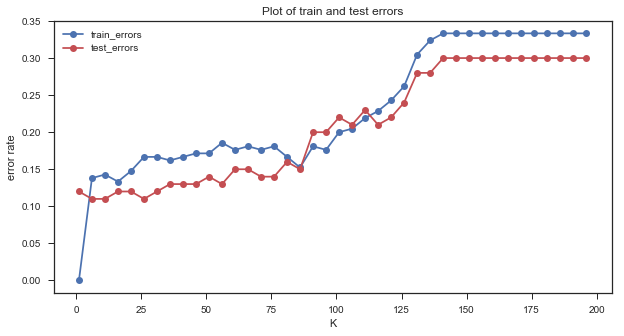

the best k for the Manhattan distance is  6
the best test error for the Manhattan distance is 0.11
the lowest training error for the Manhattan distance is 0.0


In [66]:
#KNN WITH Manhattan Distance(p=1, k ∈{1,6,11,...,196})
train_errs=[]
test_errs=[]
min_err1=1;min_err2=1;
b=tuple(range(1,197,5))
for i in b:
    knn_M = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=1, weights='uniform')
    knn_M.fit(inf_train, inf_train_target)
    pred1=knn_M.predict(inf_train)
    train_errs.append(sum(inf_train_target!=pred1)/len(inf_train_target))
    pred2=knn_M.predict(inf_test)
    test_errs.append(sum(inf_test_target!=pred2)/len(inf_test_target))
    if sum(inf_train_target!=pred1)/len(inf_train_target) < min_err1:
        min_err1=sum(inf_train_target!=pred1)/len(inf_train_target)
    if sum(inf_test_target!=pred2)/len(inf_test_target) < min_err2:
        min_err2=sum(inf_test_target!=pred2)/len(inf_test_target)
        b_k=i
errs={"train_errors":train_errs,"test_errors":test_errs}
errs=DataFrame(errs)
errs.index = range(1,197,5)
plt.figure(figsize=(10,5))
xl1 = errs.iloc[:,0]
xl2 = errs.iloc[:,1]
yl = list(range(1,197,5))
plt.title("Plot of train and test errors") 
plt.xlabel("K")
plt.ylabel("error rate")
plt.plot(yl,xl1,"b-o")
plt.plot(yl,xl2,"r-o") 
plt.legend(loc='best')
plt.show()
print("the best k for the Manhattan distance is ",b_k)
print("the best test error for the Manhattan distance is",min_err2)
print("the lowest training error for the Manhattan distance is",min_err1)

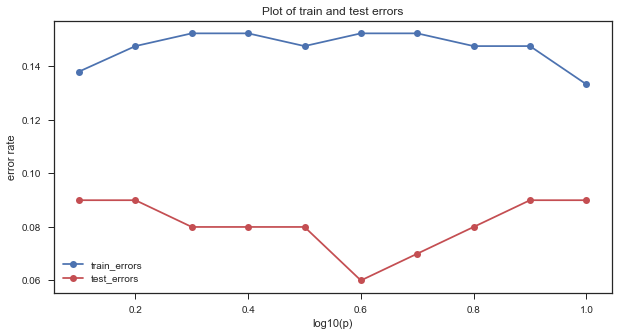

the best log10(p) is  0.6
the best test error for the Minkowski distance is 0.06
the lowest training error for the Minkowski distance is 0.13333333333333333


In [67]:
#KNN WITH Minkowski Distance(log10(p) ∈ {0.1,0.2,0.3,...,1}, b_k=6)
tr_errs=[]
tes_errs=[]
min_rr1=1;min_rr2=1;
c=[i/10.0 for i in range(1,11)]
for i in c:
    knn_m = KNeighborsClassifier(n_neighbors=b_k, metric='minkowski', p=10**i, weights='uniform')
    knn_m.fit(inf_train, inf_train_target)
    predict1=knn_m.predict(inf_train)
    tr_errs.append(sum(inf_train_target!=predict1)/len(inf_train_target))
    predict2=knn_m.predict(inf_test)
    tes_errs.append(sum(inf_test_target!=predict2)/len(inf_test_target))
    if sum(inf_train_target!=predict1)/len(inf_train_target) < min_rr1:
        min_rr1=sum(inf_train_target!=predict1)/len(inf_train_target)
    if sum(inf_test_target!=predict2)/len(inf_test_target) < min_rr2:
        min_rr2=sum(inf_test_target!=predict2)/len(inf_test_target)
        b_log=i
err={"train_errors":tr_errs,"test_errors":tes_errs}
err=DataFrame(err)
err.index = c
plt.figure(figsize=(10,5))
x1 = err.iloc[:,0]
x2 = err.iloc[:,1]
y = c
plt.title("Plot of train and test errors") 
plt.xlabel("log10(p)")
plt.ylabel("error rate")
plt.plot(y,x1,"b-o")
plt.plot(y,x2,"r-o") 
plt.legend(loc='best')
plt.show()
print("the best log10(p) is ",b_log)
print("the best test error for the Minkowski distance is",min_rr2)
print("the lowest training error for the Minkowski distance is",min_rr1)

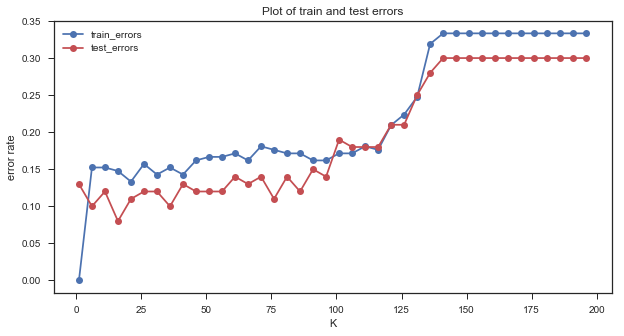

the best test error for Chebyshev Distance is  0.08
the lowest train error for Chebyshev Distance is  0.0


In [57]:
#KNN WITH  Chebyshev Distance(p →∞ , k ∈{1,6,11,...,196})
t_errs=[]
te_errs=[]
mini1=1;mini2=1;
d=tuple(range(1,197,5))
for i in d:
    knn_C = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=float(inf), weights='uniform')
    knn_C.fit(inf_train, inf_train_target)
    prediction1=knn_C.predict(inf_train)
    t_errs.append(sum(inf_train_target!=prediction1)/len(inf_train_target))
    prediction2=knn_C.predict(inf_test)
    te_errs.append(sum(inf_test_target!=prediction2)/len(inf_test_target))
    if sum(inf_train_target!=prediction1)/len(inf_train_target) < mini1:
        mini1=sum(inf_train_target!=prediction1)/len(inf_train_target)
    if sum(inf_test_target!=prediction2)/len(inf_test_target) < mini2:
        mini2=sum(inf_test_target!=prediction2)/len(inf_test_target)
ers={"train_errors":t_errs,"test_errors":te_errs}
ers=DataFrame(ers)
ers.index = range(1,197,5)
plt.figure(figsize=(10,5))
l1 = ers.iloc[:,0]
l2 = ers.iloc[:,1]
l3= list(range(1,197,5))
plt.title("Plot of train and test errors") 
plt.xlabel("K")
plt.ylabel("error rate")
plt.plot(l3,l1,"b-o")
plt.plot(l3,l2,"r-o") 
plt.legend(loc='best')
plt.show()
print("the best test error for Chebyshev Distance is ",mini2)
print("the lowest train error for Chebyshev Distance is ",mini1)

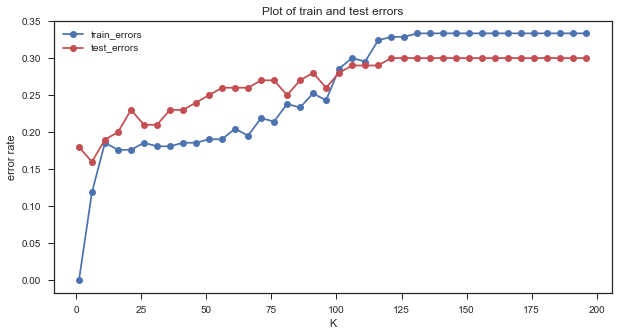

the best test error for Mahalanobis Distance is  0.16
the lowest train error for Mahalanobis Distance is  0.0


In [68]:
#KNN WITH  Mahalanobis Distance( k ∈{1,6,11,...,196})
t=[]
te=[]
minimum1=1;minimum2=1;
d=tuple(range(1,197,5))
for i in d:
    knn1 = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', weights='uniform',metric_params={'V': np.cov(inf_train,rowvar=False)},algorithm='brute')
    knn1.fit(inf_train,inf_train_target)
    p1=knn1.predict(inf_train)
    t.append(sum(inf_train_target!=p1)/len(inf_train_target))
    p2=knn1.predict(inf_test)
    te.append(sum(inf_test_target!=p2)/len(inf_test_target))
    if sum(inf_train_target!=p1)/len(inf_train_target) < minimum1:
        minimum1=sum(inf_train_target!=p1)/len(inf_train_target)
    if sum(inf_test_target!=p2)/len(inf_test_target) < minimum2:
        minimum2=sum(inf_test_target!=p2)/len(inf_test_target)
        bk=i
rs={"train_errors":t,"test_errors":te}
rs=DataFrame(rs)
rs.index = range(1,197,5)
plt.figure(figsize=(10,5))
ll1 = rs.iloc[:,0]
ll2 = rs.iloc[:,1]
ll3= list(range(1,197,5))
plt.title("Plot of train and test errors") 
plt.xlabel("K")
plt.ylabel("error rate")
plt.plot(ll3,ll1,"b-o")
plt.plot(ll3,ll2,"r-o") 
plt.legend(loc='best')
plt.show()
print("the best test error for Mahalanobis Distance is ",minimum2)
print("the lowest train error for Mahalanobis Distance is ",minimum1)

In [69]:
from prettytable import PrettyTable 
table=PrettyTable(["metric","test error(when k = k∗) "])
table.add_row(["Manhattan",min_err2])
table.add_row(["Minkowski",min_rr2])
table.add_row(["Chebyshev",mini2])
table.add_row(["Mahalanobis",minimum2])
print(table)

+-------------+--------------------------+
|    metric   | test error(when k = k∗)  |
+-------------+--------------------------+
|  Manhattan  |           0.11           |
|  Minkowski  |           0.06           |
|  Chebyshev  |           0.08           |
| Mahalanobis |           0.16           |
+-------------+--------------------------+


In [70]:
#Use weighted voting WITH Euclidean metric ( k ∈{1,6,11,16,...,196}) 
mini11=1;mini12=1;
w1=tuple(range(1,197,5))
for i in w1:
    knn_w1 = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2, weights='distance')
    knn_w1.fit(inf_train, inf_train_target)
    w11_pred=knn_w1.predict(inf_train)
    w12_pred=knn_w1.predict(inf_test)
    if sum(inf_train_target!=w11_pred)/len(inf_train_target) < mini11:
        mini11=sum(inf_train_target!=w11_pred)/len(inf_train_target)
    if sum(inf_test_target!=w12_pred)/len(inf_test_target) < mini12:
        mini12=sum(inf_test_target!=w12_pred)/len(inf_test_target)
print("the best test error is ",mini12)
print("the lowest train error is ",mini11)

the best test error is  0.1
the lowest train error is  0.0


In [71]:
#Use weighted voting WITH Manhattan metric ( k ∈{1,6,11,16,...,196}) 
mini21=1;mini22=1;
w2=tuple(range(1,197,5))
for i in w2:
    knn_w2 = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=1, weights='distance')
    knn_w2.fit(inf_train, inf_train_target)
    w21_pred=knn_w2.predict(inf_train)
    w22_pred=knn_w2.predict(inf_test)
    if sum(inf_train_target!=w21_pred)/len(inf_train_target) < mini21:
        mini21=sum(inf_train_target!=w21_pred)/len(inf_train_target)
    if sum(inf_test_target!=w22_pred)/len(inf_test_target) < mini22:
        mini22=sum(inf_test_target!=w22_pred)/len(inf_test_target)
print("the best test error is ",mini22)
print("the lowest train error is ",mini21)

the best test error is  0.1
the lowest train error is  0.0


In [72]:
#Use weighted voting WITH Chebyshev metric ( k ∈{1,6,11,16,...,196}) 
mini31=1;mini32=1;
w3=tuple(range(1,197,5))
for i in w3:
    knn_w3 = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=float(inf), weights='distance')
    knn_w3.fit(inf_train, inf_train_target)
    w31_pred=knn_w3.predict(inf_train)
    w32_pred=knn_w3.predict(inf_test)
    if sum(inf_train_target!=w31_pred)/len(inf_train_target) < mini31:
        mini31=sum(inf_train_target!=w31_pred)/len(inf_train_target)
    if sum(inf_test_target!=w32_pred)/len(inf_test_target) < mini32:
        mini32=sum(inf_test_target!=w32_pred)/len(inf_test_target)
print("the best test error is ",mini32)
print("the lowest train error is ",mini21)

the best test error is  0.11
the lowest train error is  0.0


In [73]:
lowest=min(mini11,mini21,mini31,minimum1,mini1,min_rr1,min_r1,min_err1,min_rate1)
print("the lowest training error rate I achieved in this exercise is ",lowest)

the lowest training error rate I achieved in this exercise is  0.0
